In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

import matplotlib.pyplot as plt
import numpy as np

2024-05-10 11:05:19.181371: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-10 11:05:19.181406: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-10 11:05:19.181417: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-10 11:05:19.230859: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
vgg = VGG16(input_shape= [100, 100, 3], include_top=False, weights='imagenet')

vgg_output = vgg.output
x = Flatten()(vgg_output)
x = Dense(units=4, activation='sigmoid')(x)

model = Model(vgg.input, x)

2024-05-10 11:05:21.626587: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-10 11:05:21.837466: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-10 11:05:21.837737: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
def image_generator(batch_size=64):
    while True:
        for _ in range(50): # number of batches in each epoch is just random (I chose 50)
            # Generate X - (batch_size, H, W, 3)
            # Generate y  - (batch_size, 4)
            X = np.zeros(shape=(batch_size, 100, 100, 3))
            y = np.zeros(shape=(batch_size, 4)) # x_top_right, y_top_right, height, width

            for i in range(batch_size):
                x0 = np.random.randint(0, 90)
                y0 = np.random.randint(0, 90)
                x1 = np.random.randint(x0, 100)
                y1 = np.random.randint(y0, 100)

                X[i, y0:y1, x0:x1, :] = 1
                y[i, 0] = x0/100
                y[i, 1] = y0/100
                y[i, 2] = (y1-y0) / 100
                y[i, 3] = (x1-x0) / 100

            yield X, y

In [4]:
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001))

In [5]:
model.fit_generator(
    image_generator(),
    steps_per_epoch=50,
    epochs=5
)

Epoch 1/5


/tmp/ipykernel_5175/631320469.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(
2024-05-10 11:05:25.675989: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-05-10 11:05:25.855383: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-10 11:05:29.339936: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-10 11:05:29.610885: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7a42184cd4b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-10 11:05:29.610917: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-05-10 11:05:29.622502: I tensorflow/compiler/ml

50/50 [==============================] - 30s 361ms/step - loss: 0.6358
Epoch 2/5
50/50 [==============================] - 18s 362ms/step - loss: 0.5188
Epoch 3/5
50/50 [==============================] - 18s 363ms/step - loss: 0.5040
Epoch 4/5
50/50 [==============================] - 18s 364ms/step - loss: 0.5070
Epoch 5/5
50/50 [==============================] - 18s 365ms/step - loss: 0.5051


1/1 [==============================] - 0s 12ms/step


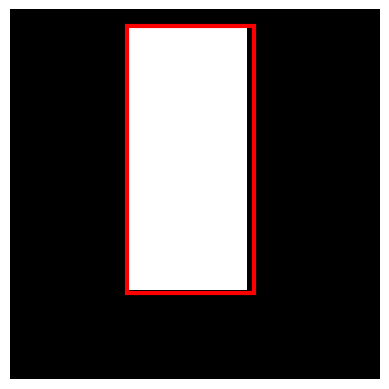

In [108]:
from matplotlib.patches import Rectangle

def predict():
    X = np.zeros(shape=(100, 100, 3))
    y = np.zeros(shape=(4)) # x_top_right, y_top_right, height, width
    x0 = np.random.randint(0, 90)
    y0 = np.random.randint(0, 90)
    x1 = np.random.randint(x0, 100)
    y1 = np.random.randint(y0, 100)

    X[y0:y1, x0:x1, :] = 1
    y[0] = x0/100
    y[1] = y0/100
    y[2] = (y1-y0) / 100
    y[3] = (x1-x0) / 100

    X = np.expand_dims(X, axis=0)
    y = np.expand_dims(y, axis=0)
    prediction = model.predict(X)
    prediction = prediction * 100
    rect = Rectangle((prediction[0, 0], prediction[0, 1]), 
                     height=prediction[0, 2], width=prediction[0, 3], 
                     edgecolor='r',
                     linewidth=3,
                     facecolor='none')
    fig, ax = plt.subplots()
    ax.axis('off')
    ax.imshow(X[0])
    ax.add_patch(rect)

    plt.show()

predict()
